# Python 101 @ SzISz IX.
---

## Today: More pandas are coming!

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
BASE_URI = "../data/"

---
## Act I: Read demographic data

Read data from a csv file

In [14]:
df = pd.read_csv(BASE_URI + 'population.csv', delimiter=',', quotechar='"',lineterminator='\n')

Select the columns we need

In [15]:
columns = ['﻿"Data Source"'] + [str(year) for year in range(1990, 2011)]
pop = df[columns].dropna()

Rename the funky named column '﻿"Data Source"' to 'country'

In [16]:
columns[0] = 'country'
pop.columns = columns
pop.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Aruba,68235,72498,76700,80326,83195,85447,87276,89004,90858,...,97015,98742,100031,100830,101219,101344,101418,101597,101932,102384
1,Andorra,58904,61003,62707,63854,64274,64090,63799,64084,65399,...,75643,79060,81223,81877,81292,79969,78659,77907,77865,78360
2,Afghanistan,13811876,15175325,16485018,17586073,18415307,19021226,19496836,19987071,20595360,...,23116142,24018682,24860855,25631282,26349243,27032197,27708187,28397812,29105480,29824536
3,Angola,11002758,11372156,11743432,12104952,12451945,12791388,13137542,13510616,13924930,...,15421075,15976715,16544376,17122409,17712824,18314441,18926650,19549124,20180490,20820525
4,Albania,3446858,3417280,3384367,3357858,3341043,3331317,3325456,3317941,3304948,...,3239385,3216197,3196130,3179573,3166222,3156608,3151185,3150143,3153883,3162083


Define the index column

In [20]:
pop = pop.set_index('country')
pop.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,,,,,,
Aruba,68235,72498,76700,80326,83195,85447,87276,89004,90858,92894,...,97015,98742,100031,100830,101219,101344,101418,101597,101932,102384
Andorra,58904,61003,62707,63854,64274,64090,63799,64084,65399,68000,...,75643,79060,81223,81877,81292,79969,78659,77907,77865,78360
Afghanistan,13811876,15175325,16485018,17586073,18415307,19021226,19496836,19987071,20595360,21347782,...,23116142,24018682,24860855,25631282,26349243,27032197,27708187,28397812,29105480,29824536
Angola,11002758,11372156,11743432,12104952,12451945,12791388,13137542,13510616,13924930,14385283,...,15421075,15976715,16544376,17122409,17712824,18314441,18926650,19549124,20180490,20820525
Albania,3446858,3417280,3384367,3357858,3341043,3331317,3325456,3317941,3304948,3286084,...,3239385,3216197,3196130,3179573,3166222,3156608,3151185,3150143,3153883,3162083


Select a few countries

In [21]:
countries = [ u'United Kingdom', u'Hungary', u'France', u'Germany']
subpop = pop[pop.index.isin(countries)]
subpop

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,,,,,,
Germany,80624598,81156363,81438348,81678051,81914831,82034771,82047195,82100243,82211508,82349925,...,82534176,82516260,82469422,82376451,82266372,82110097,81902307,81776930,81797673,80425823
France,58849212,59105073,59325793,59540711,59752020,59963792,60185178,60495470,60911057,61355725,...,62242474,62702121,63176246,63617975,64012572,64371099,64702921,65031235,65371613,65696689
United Kingdom,57580402,57718614,57865745,58019030,58166950,58316954,58487141,58682466,58892514,59107960,...,59637719,59978349,60387997,60828396,61296895,61773855,62238723,62747868,63259912,63612729
Hungary,10369341,10357523,10343355,10328965,10311238,10290486,10266570,10237530,10210971,10187576,...,10129552,10107146,10087065,10071370,10055780,10038188,10022650,10000023,9971727,9920362


Pivot the dataframe

In [23]:
subpop_plot = subpop.stack()
subpop_plot

country             
Germany         1990    80624598
                1991    81156363
                1992    81438348
                1993    81678051
                1994    81914831
                1995    82034771
                1996    82047195
                1997    82100243
                1998    82211508
                1999    82349925
                2000    82488495
                2001    82534176
                2002    82516260
                2003    82469422
                2004    82376451
                2005    82266372
                2006    82110097
                2007    81902307
                2008    81776930
                2009    81797673
                2010    80425823
France          1990    58849212
                1991    59105073
                1992    59325793
                1993    59540711
                1994    59752020
                1995    59963792
                1996    60185178
                1997    60495470
                1998  

In [24]:
subpop_plot.unstack('country').head()

country,Germany,France,United Kingdom,Hungary
1990,80624598,58849212,57580402,10369341
1991,81156363,59105073,57718614,10357523
1992,81438348,59325793,57865745,10343355
1993,81678051,59540711,58019030,10328965
1994,81914831,59752020,58166950,10311238


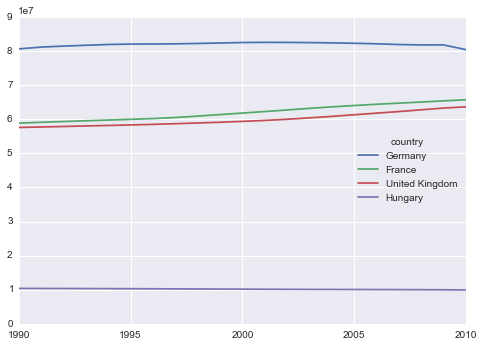

In [25]:
subpop_plot = subpop_plot.unstack('country')
subpop_plot.plot()

---
## Act II: Read data about alcohol

Read the data

In [26]:
df = pd.read_csv(BASE_URI + 'alcohol.csv', delimiter=',', quotechar='"',lineterminator='\n')
df.head()

,Indicator,Data Source,PUBLISH STATES,Year,WHO region,Country,Beverage Types,Display Value,Numeric,Low,High,Comments
0,Recorded alcohol per capita (15+) consumption ...,Data source,Published,2003,Europe,Slovenia,Wine,3.49,NaN,NaN,NaN,NaN
1,Recorded alcohol per capita (15+) consumption ...,Data source,Published,1999,Europe,The former Yugoslav Republic of Macedonia,Beer,1.92,NaN,NaN,NaN,NaN
2,Recorded alcohol per capita (15+) consumption ...,Data source,Published,2008,Europe,Turkmenistan,Spirits,1.19,NaN,NaN,NaN,NaN
3,Recorded alcohol per capita (15+) consumption ...,Data source,Published,2006,Europe,Belarus,All,12.62,NaN,NaN,NaN,NaN
4,Recorded alcohol per capita (15+) consumption ...,Data source,Published,2006,Europe,Czech Republic,Wine,2.30,NaN,NaN,NaN,NaN


Select the columns, and rename them

In [27]:
columns = ['Country', 'Year', 'Beverage Types', 'Display Value']
alc = df[columns].dropna()
alc.columns = ['country', 'year', 'type', 'alcohol']
alc.head()

,country,year,type,alcohol
0,Slovenia,2003,Wine,3.49
1,The former Yugoslav Republic of Macedonia,1999,Beer,1.92
2,Turkmenistan,2008,Spirits,1.19
3,Belarus,2006,All,12.62
4,Czech Republic,2006,Wine,2.30


Select a few countries

In [28]:
countries = [ u'United Kingdom', u'Hungary', u'France', u'Germany']
subalc = alc[alc['country'].isin(countries)]
subalc.head()

,country,year,type,alcohol
6,United Kingdom,2010,All,10.26
12,Hungary,2005,Spirits,4.14
30,United Kingdom,2001,Other alcoholic beverages,0.64
37,Hungary,1992,Beer,5.81
60,Germany,2011,All,10.97


We only care about the combined consumption

In [29]:
subalc = subalc[subalc['type'] == 'All']
del subalc['type']
subalc.head()

,country,year,alcohol
6,United Kingdom,2010,10.26
60,Germany,2011,10.97
121,Hungary,1991,15.43
147,United Kingdom,2008,10.35
165,Germany,2009,11.23


In [30]:
subalc.set_index('country').head()

,year,alcohol
country,,
United Kingdom,2010,10.26
Germany,2011,10.97
Hungary,1991,15.43
United Kingdom,2008,10.35
Germany,2009,11.23


Transform data into a desirable format

In [31]:
subalc = subalc.pivot(index='country', columns='year', values='alcohol')
subalc.head()

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
country,,,,,,,,,,,,,,,,,,,,,
France,15.73,14.85,14.72,14.24,14.11,14.12,13.77,13.31,13.27,13.15,...,13.49,13.18,12.20,12.40,12.20,11.90,11.80,11.70,NaN,NaN
Germany,14.89,13.92,13.84,13.50,13.37,13.35,13.12,13.00,12.74,12.78,...,11.92,11.83,11.68,11.76,11.51,11.37,11.23,11.21,10.97,10.95
Hungary,16.15,15.43,14.82,14.16,13.71,12.56,12.55,12.51,12.69,12.09,...,13.08,13.12,12.94,13.16,12.55,11.64,11.46,10.78,11.44,NaN
United Kingdom,9.96,10.01,9.65,9.45,9.41,9.70,9.75,9.97,10.14,10.16,...,11.46,11.70,11.23,11.08,11.18,10.35,10.49,10.26,10.59,NaN


Pivot again

In [32]:
subalc_plot = subalc.stack()
subalc_plot = subalc_plot.unstack('country')
subalc_plot.head()

country,France,Germany,Hungary,United Kingdom
year,,,,
1990,15.73,14.89,16.15,9.96
1991,14.85,13.92,15.43,10.01
1992,14.72,13.84,14.82,9.65
1993,14.24,13.50,14.16,9.45
1994,14.11,13.37,13.71,9.41


Rename columns

In [33]:
subalc_plot.columns = [u'France_alc', u'Germany_alc', u'Hungary_alc', u'United Kingdom_alc']

Plot!

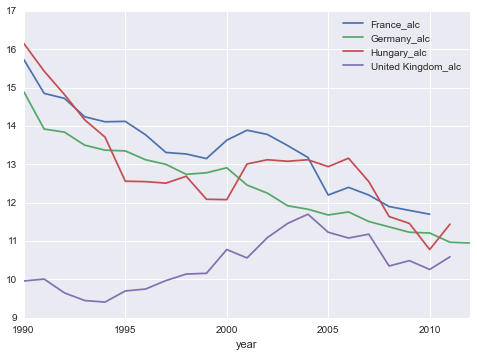

In [34]:
subalc_plot.plot()

---
## Act III: Merge data

Check indexes

In [35]:
subpop_plot.index

Index([u'1990', u'1991', u'1992', u'1993', u'1994', u'1995', u'1996', u'1997',
       u'1998', u'1999', u'2000', u'2001', u'2002', u'2003', u'2004', u'2005',
       u'2006', u'2007', u'2008', u'2009', u'2010'],
      dtype='object')

In [36]:
subpop_plot.index = subpop_plot.index.astype(np.int)

In [37]:
subalc_plot.index

Int64Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012],
           dtype='int64', name=u'year')

Remove the columns which only appears in one of the datasets

In [38]:
subalc_plot = subalc_plot[subalc_plot.index < 2011]
subpop_plot = subpop_plot[subpop_plot.index < 2011]

Merge!

In [39]:
#        dataset1    merge(dataset2     base of the connection)         
merged = subpop_plot.join(subalc_plot)#, left_index=True, right_index=True, on=subalc_plot.index)
merged.head()

country,Germany,France,United Kingdom,Hungary,France_alc,Germany_alc,Hungary_alc,United Kingdom_alc
1990,80624598,58849212,57580402,10369341,15.73,14.89,16.15,9.96
1991,81156363,59105073,57718614,10357523,14.85,13.92,15.43,10.01
1992,81438348,59325793,57865745,10343355,14.72,13.84,14.82,9.65
1993,81678051,59540711,58019030,10328965,14.24,13.50,14.16,9.45
1994,81914831,59752020,58166950,10311238,14.11,13.37,13.71,9.41


Rename the key_0 column, and make it index column  
Plot the data into multiple coordinate system

array([<matplotlib.axes._subplots.AxesSubplot object at 0x107b4c190>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10e097290>], dtype=object)

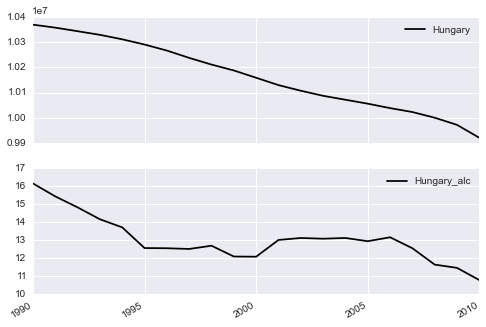

In [40]:
merged[['Hungary', 'Hungary_alc']].plot(subplots=True)

Compute the actual alcohol consumption

In [41]:
merged['France_comp'] = merged['France'] * merged['France_alc']
merged['Germany_comp'] = merged['Germany'] * merged['Germany_alc']
merged['United Kingdom_comp'] = merged['United Kingdom'] * merged['United Kingdom_alc']
merged['Hungary_comp'] = merged['Hungary'] * merged['Hungary_alc']

And plot it!

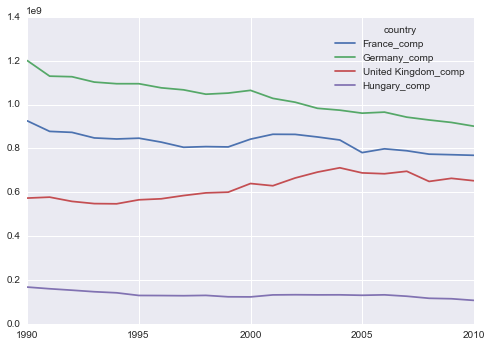

In [42]:
merged[['France_comp', 'Germany_comp', 'United Kingdom_comp', 'Hungary_comp']].plot()

---
## Final Act: your play time!

Plot the top 5 alcohol consuming country in 1990 and their consumption

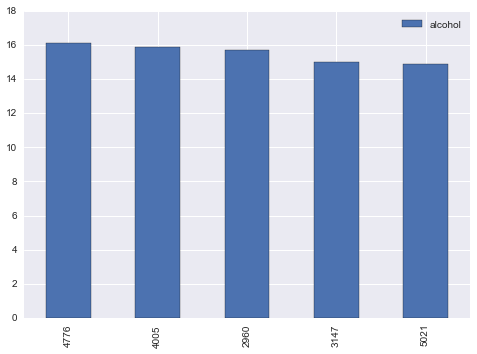

In [44]:
(alc
 [alc['year'] == 1990]
 [alc['type'] == 'All']
 [['country', 'alcohol']]
 .sort(columns='alcohol', ascending=False)
 .head(5)
 .plot(kind='bar'))

Plot the average alcohol consumption in France, Germany, UK and Hungary

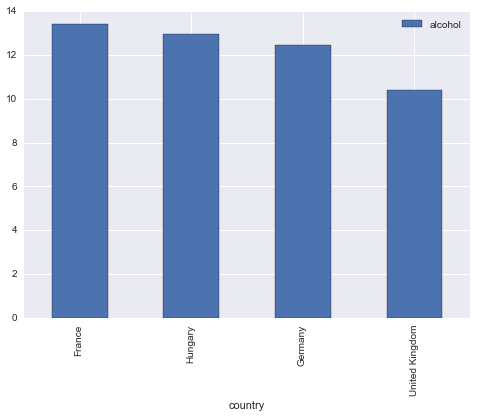

In [45]:
(alc
 [alc['country'].isin(['France', 'Germany', 'United Kingdom', 'Hungary'])]
 [alc['type'] == 'All']
 [['country', 'alcohol']]
 .groupby('country')
 .mean()
 .sort('alcohol', ascending=False)
 .plot(kind='bar'))